In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.io import fits
from astropy.table import Table

In [43]:
vis_430M = Table.read('../data/Visib_4.3um.dat',format='ascii')
vis_480M = Table.read('../data/Visib_4.8um.dat',format='ascii')

vis_340M = Table.read('../data/Visib_3.40um.dat',format='ascii')
vis_361M = Table.read('../data/Visib_3.61um.dat',format='ascii')

vis_430M.rename_column('col1','Baseline')
vis_430M.rename_column('col2','Full Visibility')
vis_430M.rename_column('col3','Star Visibility')

vis_480M.rename_column('col1','Baseline')
vis_480M.rename_column('col2','Full Visibility')
vis_480M.rename_column('col3','Star Visibility')

vis_340M.rename_column('col1','Baseline')
vis_340M.rename_column('col2','Full Visibility')
vis_340M.rename_column('col3','Star Visibility')

vis_361M.rename_column('col1','Baseline')
vis_361M.rename_column('col2','Full Visibility')
vis_361M.rename_column('col3','Star Visibility')


In [102]:
vis_430Mb = Table.read('../Visib_4.3um.dat',format='ascii')
vis_480Mb = Table.read('../Visib_4.8um.dat',format='ascii')


vis_430Mb.rename_column('col1','Baseline')
vis_430Mb.rename_column('col2','Full Visibility')
vis_430Mb.rename_column('col3','Star Visibility')

vis_480Mb.rename_column('col1','Baseline')
vis_480Mb.rename_column('col2','Full Visibility')
vis_480Mb.rename_column('col3','Star Visibility')

In [104]:
# poly430M = np.poly1d(np.polyfit(vis_430M['Baseline'][:10],vis_430M['Full Visibility'][:12],4))
# poly480M = np.poly1d(np.polyfit(vis_480M['Baseline'][:10],vis_480M['Full Visibility'][:12],4))
# jwst_baselines = np.linspace(0,10,1000)

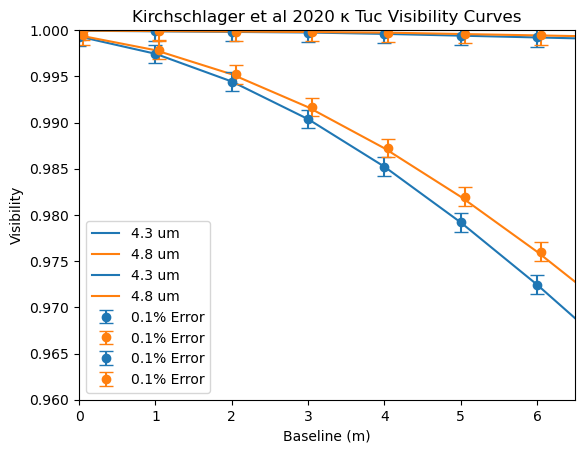

In [108]:
plt.plot(vis_430M['Baseline'],vis_430M['Full Visibility'],label='4.3 um',color='C0')
plt.plot(vis_480M['Baseline'],vis_480M['Full Visibility'],label='4.8 um',color='C1')

plt.plot(vis_430Mb['Baseline'],vis_430Mb['Full Visibility'],label='4.3 um',color='C0')
plt.plot(vis_480Mb['Baseline'],vis_480Mb['Full Visibility'],label='4.8 um',color='C1')

# plt.plot(jwst_baselines,poly430M(jwst_baselines),color='C0',linestyle='--',label='4.3 um')
# plt.plot(jwst_baselines,poly480M(jwst_baselines),color='C1',linestyle='--',label='4.8 um')
# plt.plot(vis_340M['Baseline'],vis_340M['Full Visibility'],label='3.4 um',color='C2')
# plt.plot(vis_361M['Baseline'],vis_361M['Full Visibility'],label='3.61 um',color='C3')

precision = 1e-3

plt.errorbar(vis_430M['Baseline'],vis_430M['Full Visibility'],yerr=np.ones_like(vis_430M['Star Visibility'])*precision,
             fmt='o',color='C0',capsize=5,label=f'{precision*100}% Error')
plt.errorbar(vis_480M['Baseline']+0.05,vis_480M['Full Visibility'],yerr=np.ones_like(vis_480M['Star Visibility'])*precision,
            fmt='o',color='C1',capsize=5,label=f'{precision*100}% Error')
plt.errorbar(vis_430Mb['Baseline'],vis_430Mb['Full Visibility'],yerr=np.ones_like(vis_430Mb['Star Visibility'])*precision,
             fmt='o',color='C0',capsize=5,label=f'{precision*100}% Error')
plt.errorbar(vis_480Mb['Baseline']+0.05,vis_480Mb['Full Visibility'],yerr=np.ones_like(vis_480Mb['Star Visibility'])*precision,
            fmt='o',color='C1',capsize=5,label=f'{precision*100}% Error')

# plt.errorbar(vis_340M['Baseline']+0.1,vis_340M['Full Visibility'],yerr=np.ones_like(vis_340M['Star Visibility'])*precision,
#             fmt='o',color='C2',capsize=5,label=f'{precision*100}% Error')
# plt.errorbar(vis_361M['Baseline']+0.15,vis_361M['Full Visibility'],yerr=np.ones_like(vis_361M['Star Visibility'])*precision,
#             fmt='o',color='C3',capsize=5,label=f'{precision*100}% Error')

plt.xlabel('Baseline (m)')
plt.ylabel('Visibility')
plt.legend(loc='lower left')

plt.xlim(0,6.5)
plt.ylim(0.96,1)
plt.title('Kirchschlager et al 2020 κ Tuc Visibility Curves')
plt.savefig('florian_visibilities.png',bbox_inches='tight')

In [111]:
!mv ../data/corr*.npz ../data/sim_fits

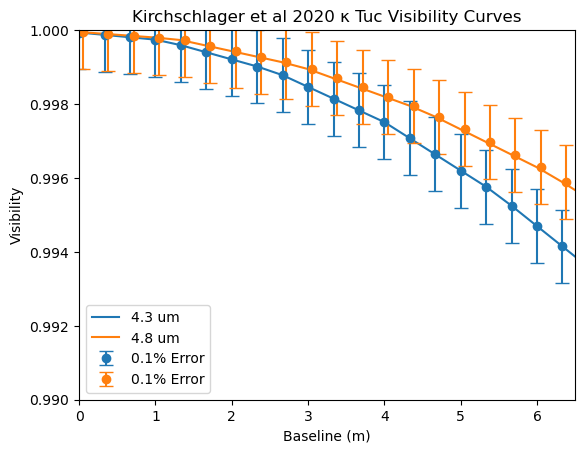

In [99]:
plt.plot(vis_430M['Baseline']/3,vis_430M['Full Visibility'],label='4.3 um',color='C0')
plt.plot(vis_480M['Baseline']/3,vis_480M['Full Visibility'],label='4.8 um',color='C1')
# plt.plot(vis_340M['Baseline'],vis_340M['Full Visibility'],label='3.4 um',color='C2')
# plt.plot(vis_361M['Baseline'],vis_361M['Full Visibility'],label='3.61 um',color='C3')

precision = 1e-3

plt.errorbar(vis_430M['Baseline']/3,vis_430M['Full Visibility'],yerr=np.ones_like(vis_430M['Star Visibility'])*precision,
             fmt='o',color='C0',capsize=5,label=f'{precision*100}% Error')
plt.errorbar(vis_480M['Baseline']/3+0.05,vis_480M['Full Visibility'],yerr=np.ones_like(vis_480M['Star Visibility'])*precision,
            fmt='o',color='C1',capsize=5,label=f'{precision*100}% Error')
# plt.errorbar(vis_340M['Baseline']+0.1,vis_340M['Full Visibility'],yerr=np.ones_like(vis_340M['Star Visibility'])*precision,
#             fmt='o',color='C2',capsize=5,label=f'{precision*100}% Error')
# plt.errorbar(vis_361M['Baseline']+0.15,vis_361M['Full Visibility'],yerr=np.ones_like(vis_361M['Star Visibility'])*precision,
#             fmt='o',color='C3',capsize=5,label=f'{precision*100}% Error')

plt.xlabel('Baseline (m)')
plt.ylabel('Visibility')
plt.legend(loc='lower left')

plt.xlim(0,6.5)
plt.ylim(0.99,1)
plt.title('Kirchschlager et al 2020 κ Tuc Visibility Curves')
plt.savefig('florian_visibilities.png',bbox_inches='tight')